In [34]:
#Exploratory data analysis packages
import pandas as pd
import numpy as np
import random

In [35]:
# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [36]:
dataset=pd.read_csv("finaldataset.csv")

In [37]:
dataset.head(5)

,Unnamed: 0,url,label
0,0,http://br14.teste.website/~exclus23/produto/18...,1
1,1,http://www.boutycone.fr/mail/assure_somtc=true...,1
2,2,https://www.stoneville.bfb.asn.au/sign-in,1
3,3,http://radioramamexicali.com/alor/index.html,1
4,4,http://radioramabajio.com/dhll/DHLAUTO/dhl2.htm,1


In [38]:
dataset.tail(5)

,Unnamed: 0,url,label
49995,49995,boltek.com,0
49996,49996,congressionalaward.org,0
49997,49997,agenet.com,0
49998,49998,celebsrc.com,0
49999,49999,marriagesherpa.com,0


In [39]:
dataset.shape

(50000, 3)

In [40]:
dataset.groupby(by='label').count()

,Unnamed: 0,url
label,,
0,47290,47290
1,2710,2710


In [41]:
#Check for any missing data. If the output is not 0 then there is a value missing in the data set
dataset.isnull().sum().sum()

0

In [42]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	# make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens
print("Done")

Done


In [43]:
# Labels which indicate if an URL is spam or ham
y = dataset["label"]

In [44]:
y.count()

50000

In [45]:
# Features here are the URLs
url_list = dataset["url"]

In [46]:
url_list.count()

50000

In [47]:
# Using Custom Tokenizer
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [48]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
import time
start_train=time.time()

In [51]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
Log_Regression = LogisticRegression()

# fit the model with data
Log_Regression.fit(X_train,y_train)

/home/swapneel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
end_train=time.time()
print("Time to Train : ",(end_train-start_train)*1000," milli Seconds")

Time to Train :  203.77326011657715  milli Seconds


In [53]:
start_test=time.time()

In [54]:
# Accuracy of Our Model Using Test Data
print("Accuracy : ",Log_Regression.score(X_test, y_test)*100,"%")

Accuracy :  99.79 %


In [55]:
# Accuracy of Our Model Using Train Data
print("Accuracy : ",Log_Regression.score(X_train, y_train)*100,"%")

Accuracy :  99.8575 %


In [56]:
end_test=time.time()
print("Time to Test : ",(end_test-start_test)*1000," milli Seconds")

Time to Test :  310.92047691345215  milli Seconds


In [57]:
X_predict1 = ["https://www.google.com", 
"https://www.pes.edu","www.buyfakebillsonlinee.blogspot.com", 
"www.unitedairlineslogistics.com"]

In [58]:
X_predict1 = vectorizer.transform(X_predict1)
New_predict1 = Log_Regression.predict(X_predict1)
print(New_predict1)

[1 1 0 0]


In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
predicted = Log_Regression.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)

[[9460    0]
 [  21  519]]


In [61]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9460
           1       1.00      0.96      0.98       540

   micro avg       1.00      1.00      1.00     10000
   macro avg       1.00      0.98      0.99     10000
weighted avg       1.00      1.00      1.00     10000



In [62]:
# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

matrix

array([[9460,    0],
       [  21,  519]])

In [63]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

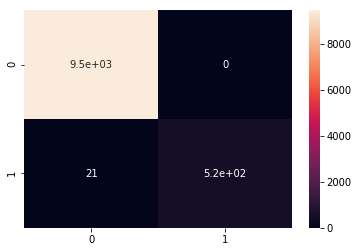

In [64]:
# Confusion Matrix Graph With Seaborn
sns.heatmap(matrix,annot=True)
plt.show()

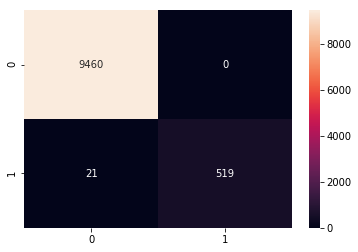

In [65]:
# Setting formate to integer with "d"
sns.heatmap(matrix,annot=True,fmt="d")
plt.show()

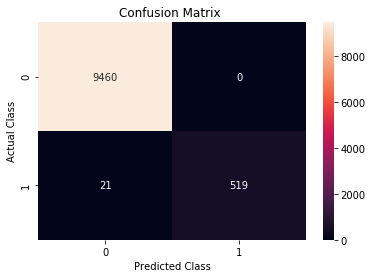

In [66]:
# Plot with Labels

plt.title('Confusion Matrix ')

sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
plt.xlabel('Predicted Class')
# Set y-axis label
plt.ylabel('Actual Class')
plt.show()